<a href="https://colab.research.google.com/github/PrashAI/myprojectr/blob/master/Linear_Regression_Adipose_Tissue_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
wcat = pd.read_csv('/content/WC_AT.csv')
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


**EDA** of this datasets

In [6]:
wcat.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [7]:
wcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [8]:
wcat.isnull().sum()

,0
Waist,0
AT,0


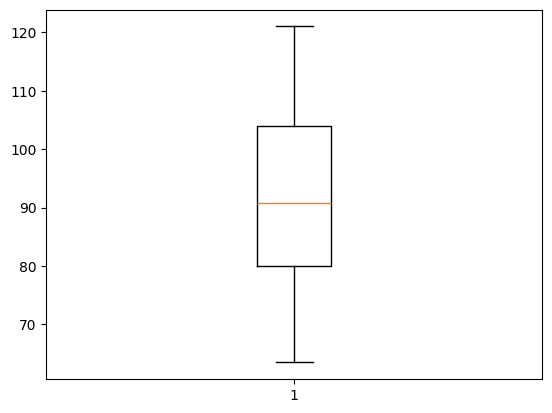

In [9]:
plt.boxplot(wcat.Waist)
plt.show()

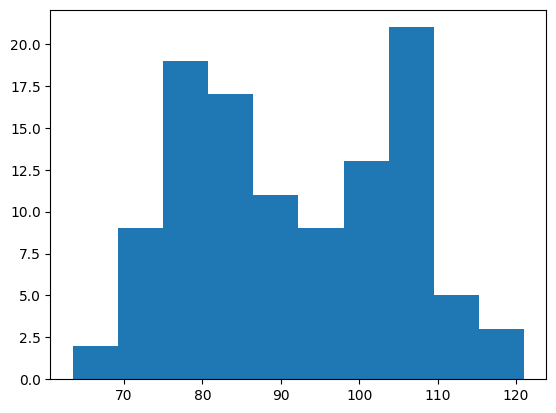

In [10]:
plt.hist(wcat.Waist)
plt.show()

<ipython-input-11-c2e4eb4795b0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wcat['AT'])


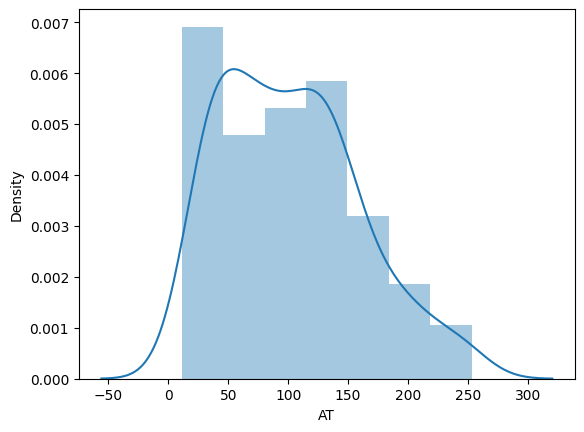

In [11]:
sns.distplot(wcat['AT'])
plt.show()

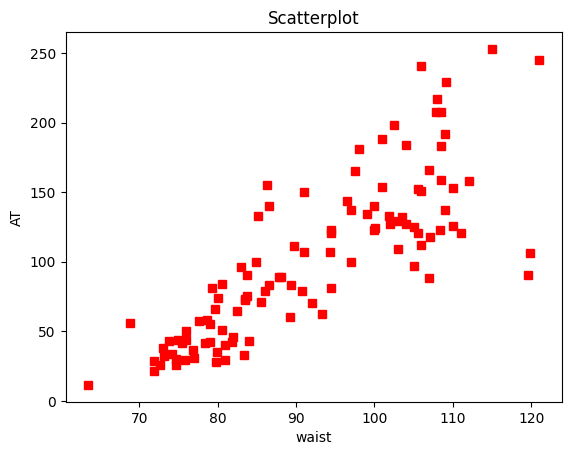

In [12]:
plt.plot(wcat.Waist, wcat.AT, 'rs')
plt.xlabel('waist')
plt.ylabel('AT')
plt.title('Scatterplot')
plt.show()

In [13]:
wcat.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


**Building Model**

In [14]:
import statsmodels.formula.api as smf
model1 = smf.ols('AT~Waist', data=wcat).fit()
model1.params

,0
Intercept,-215.981488
Waist,3.458859


In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.62e-27
Time:                        12:28:06   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Building Predictions**(Predicted Values of AT)

In [17]:
pred_lin = model1.predict(wcat.Waist)
pred_lin

,0
0,42.568252
1,35.131704
2,66.953210
3,74.389758
4,42.222366
...,...
104,130.250337
105,106.730093
106,136.130398
107,157.229440


**Error(Actual-Predicted)**

In [18]:
model1.resid

,0
0,-16.848252
1,-9.241704
2,-24.353210
3,-31.589758
4,-12.382366
...,...
104,-6.250337
105,-44.530093
106,-3.130398
107,50.770560


In [20]:
rmse_lin = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred_lin))**2))
rmse_lin

32.760177495755144

NameError: name 'pred' is not defined

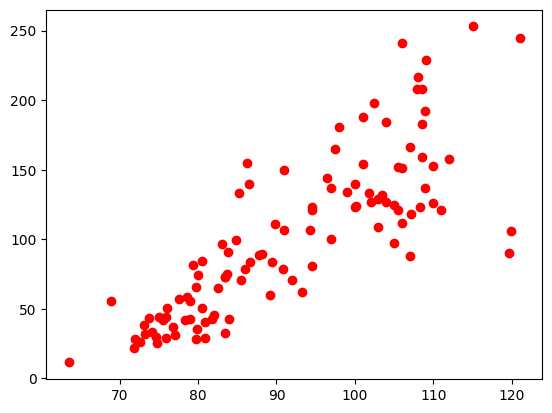

In [21]:
plt.scatter(x= wcat['Waist'], y=wcat['AT'], color='red')
plt.plot(wcat['Waist'], pred, color='yellow')
plt.xlabel('Waist')
plt.ylabel('AT')

**Transformation of model(As R2 values is low as 0.67)**

In [22]:
model2 = smf.ols('AT~np.log(Waist)', data=wcat).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           6.80e-28
Time:                        12:29:40   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
predict2 = model2.predict(pd.DataFrame(wcat['Waist']))
predict2

,0
0,39.828156
1,30.572779
2,68.410960
3,76.638769
4,39.403610
...,...
104,132.438233
105,110.127880
106,137.778929
107,156.234559


In [24]:
model2.resid

,0
0,-14.108156
1,-4.682779
2,-25.810960
3,-33.838769
4,-9.563610
...,...
104,-8.438233
105,-47.927880
106,-4.778929
107,51.765441


In [25]:
rmse_log = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(predict2))**2))
rmse_log

32.49688490932126

In [26]:
predict2.corr(wcat.AT)

0.8217781862645351

Text(0, 0.5, 'AT')

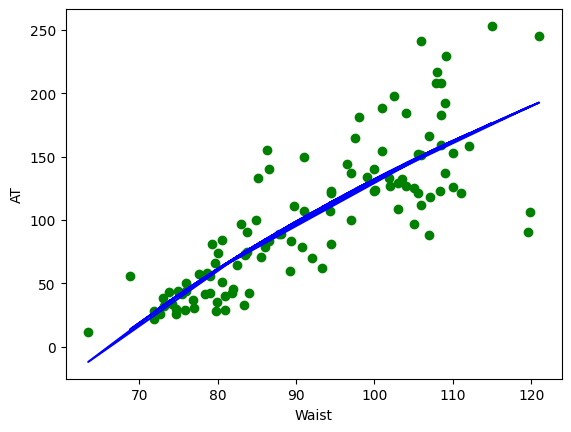

In [27]:
plt.scatter(x= wcat['Waist'], y=wcat['AT'], color='green')
plt.plot(wcat['Waist'], predict2, color='blue')
plt.xlabel('Waist')
plt.ylabel('AT')

**Building Model3 (Exponential)**

In [28]:
model3 = smf.ols('np.log(AT)~Waist',data=wcat).fit()
model3.summary()
model3.params

,0
Intercept,0.741021
Waist,0.040252


In [29]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           2.68e-30
Time:                        12:30:25   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
pred3 = model3.predict(pd.DataFrame(wcat['Waist']))
pred3

,0
0,3.749889
1,3.663346
2,4.033669
3,4.120211
4,3.745864
...,...
104,4.770288
105,4.496571
106,4.838717
107,5.084257


In [31]:
predict3 = np.exp(pred3)
predict3

,0
0,42.516361
1,38.991601
2,56.467684
3,61.572246
4,42.345566
...,...
104,117.953181
105,89.709020
106,126.307181
107,161.459872


In [32]:
rmse_exp = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(predict3))**2))
rmse_exp

38.52900175807143

In [33]:
predict3.corr(wcat.AT)

0.7633804583650525

Text(0, 0.5, 'AT')

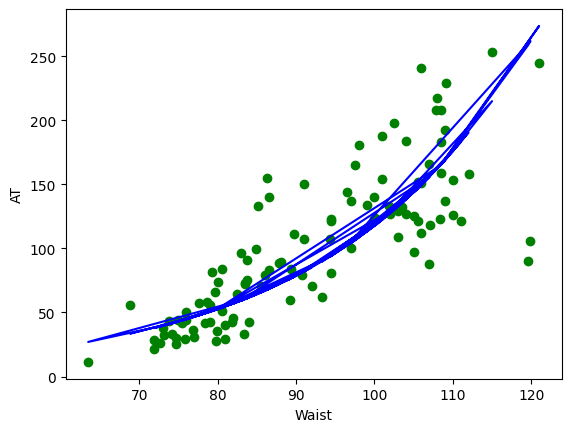

In [34]:
plt.scatter(x= wcat['Waist'], y=wcat['AT'], color='green')
plt.plot(wcat['Waist'], predict3, color='blue')
plt.xlabel('Waist')
plt.ylabel('AT')

**Building Model no4**

In [35]:
wcat['waist_sq'] = wcat.Waist*wcat.Waist
wcat

,Waist,AT,waist_sq
0,74.75,25.72,5587.5625
1,72.60,25.89,5270.7600
2,81.80,42.60,6691.2400
3,83.95,42.80,7047.6025
4,74.65,29.84,5572.6225
...,...,...,...
104,100.10,124.00,10020.0100
105,93.30,62.20,8704.8900
106,101.80,133.00,10363.2400
107,107.90,208.00,11642.4100


In [36]:
model4 = smf.ols('np.log(AT)~Waist+waist_sq',data=wcat).fit()
model4.params

,0
Intercept,-7.824071
Waist,0.228864
waist_sq,-0.001016


In [37]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.80e-35
Time:                        12:31:04   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
waist_sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
pred4 = model4.predict(wcat)
predict4 = np.exp(pred4)
predict4

,0
0,36.779400
1,31.026570
2,60.145769
3,68.488132
4,36.497176
...,...
104,134.555999
105,108.012957
106,140.081911
107,154.205675


In [39]:
rmse_quad = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(predict4))**2))
rmse_quad

32.24444782776221

Text(0, 0.5, 'AT')

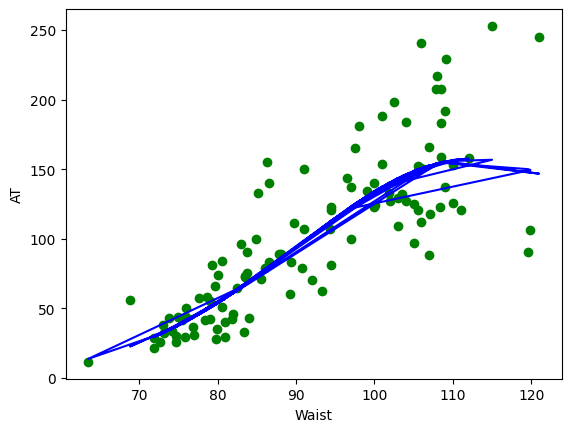

In [40]:
plt.scatter(x= wcat['Waist'], y=wcat['AT'], color='green')
plt.plot(wcat['Waist'], predict4, color='blue')
plt.xlabel('Waist')
plt.ylabel('AT')

**Model Validation: When mean=0 and Same variance from mean value**

In [47]:
data = {"Model":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values": pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        }
table = pd.DataFrame(data)
table

,Model,RMSE_Values
0,rmse_lin,32.760177
1,rmse_log,32.496885
2,rmse_exp,38.529002
3,rmse_quad,32.244448


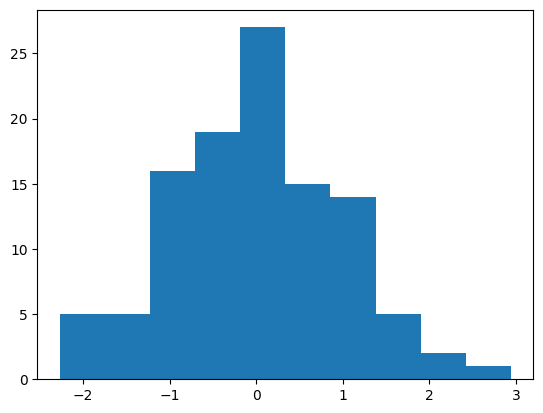

In [48]:
plt.hist(model4.resid_pearson)
plt.show()

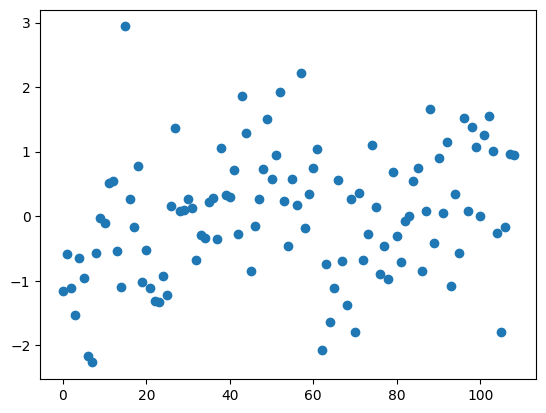

In [49]:
plt.scatter(np.arange(109), model4.resid_pearson)
plt.show()

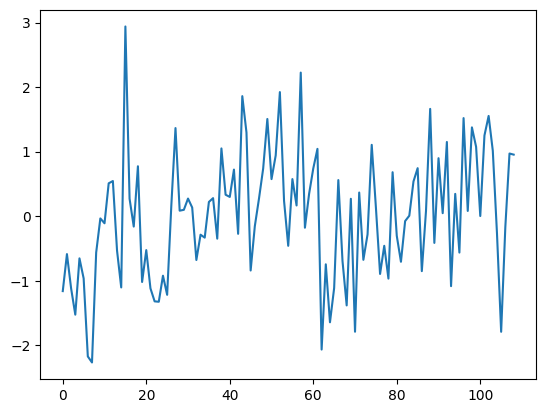

In [50]:
plt.plot(np.arange(109), model4.resid_pearson)
plt.show()